# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge( study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [123]:
# Checking the number of mice.
print("Number of Mice tested:")
mouse_data["Mouse ID"].nunique()

Number of Mice tested:


249

In [124]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_data_complete=mouse_data.drop_duplicates(subset=['Mouse ID',"Timepoint"])
mouse_data_complete.head(15)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [125]:
# Optional: Get all the data for the duplicate mouse ID. 


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_byid=mouse_data_complete.drop_duplicates(subset=['Mouse ID'])
mouse_data_byid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [127]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete['Mouse ID'].nunique()


249

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#data_by_regimen=mouse_data_complete.groupby(['Drug Regimen']).describe()

#data_by_regimen.head(10)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. SEM=standard error on means

data_by_regimen_tumor=mouse_data_complete[['Drug Regimen','Tumor Volume (mm3)']].copy()
data_by_regimen_tumor=data_by_regimen_tumor.groupby(['Drug Regimen']).describe()

data_sem=mouse_data_complete[['Drug Regimen','Tumor Volume (mm3)']].copy()
data_sem=data_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM (mm3)"})
data_sem=data_sem.groupby(['Drug Regimen']).sem()

data_sem.head(10)
data_by_regimen_tumor=data_by_regimen_tumor.merge(data_sem,how='right',on=["Drug Regimen"])
#data_sem.head()
# Assemble the resulting series into a single summary DataFrame.
data_by_regimen_tumor


C:\Users\Leo\AppData\Local\Temp\ipykernel_33828\1402342768.py:17: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data_by_regimen_tumor=data_by_regimen_tumor.merge(data_sem,how='right',on=["Drug Regimen"])


,"(Tumor Volume (mm3), count)","(Tumor Volume (mm3), mean)","(Tumor Volume (mm3), std)","(Tumor Volume (mm3), min)","(Tumor Volume (mm3), 25%)","(Tumor Volume (mm3), 50%)","(Tumor Volume (mm3), 75%)","(Tumor Volume (mm3), max)",Tumor Volume SEM (mm3)
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421,0.525862
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


In [129]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)'>

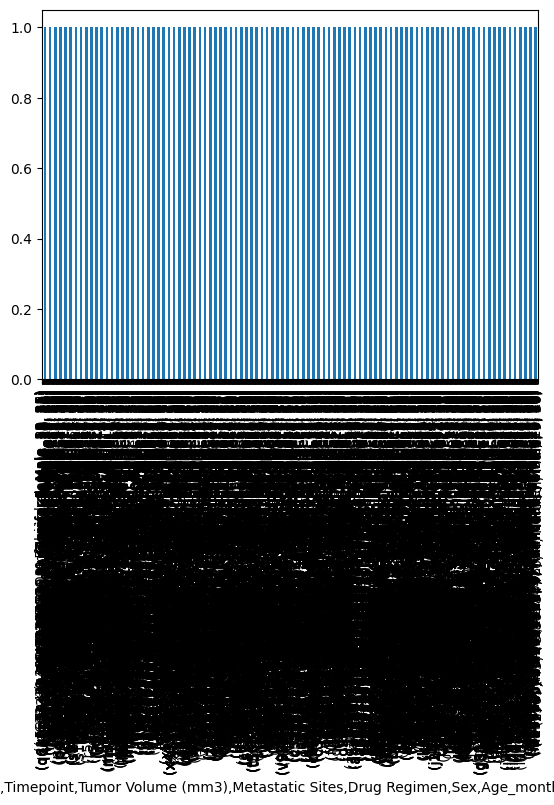

In [130]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data_complete.value_counts().plot(kind='bar',x='Drug Regimen',y='Tumor Volume (mm3)')

<BarContainer object of 1888 artists>

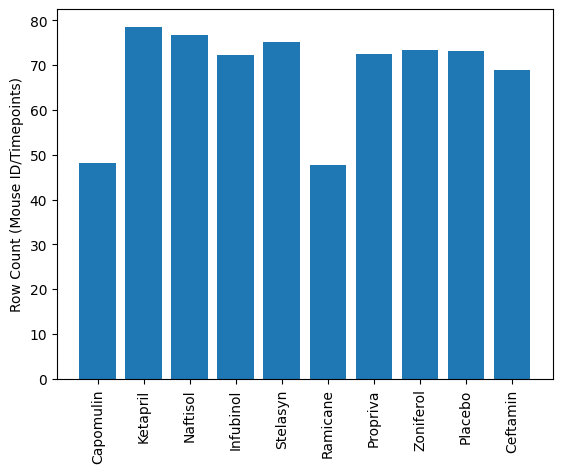

In [131]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.xticks(rotation = 90)
plt.ylabel("Row Count (Mouse ID/Timepoints)")
plt.bar(mouse_data_complete['Drug Regimen'], mouse_data_complete['Tumor Volume (mm3)'], align="center")

<Axes: >

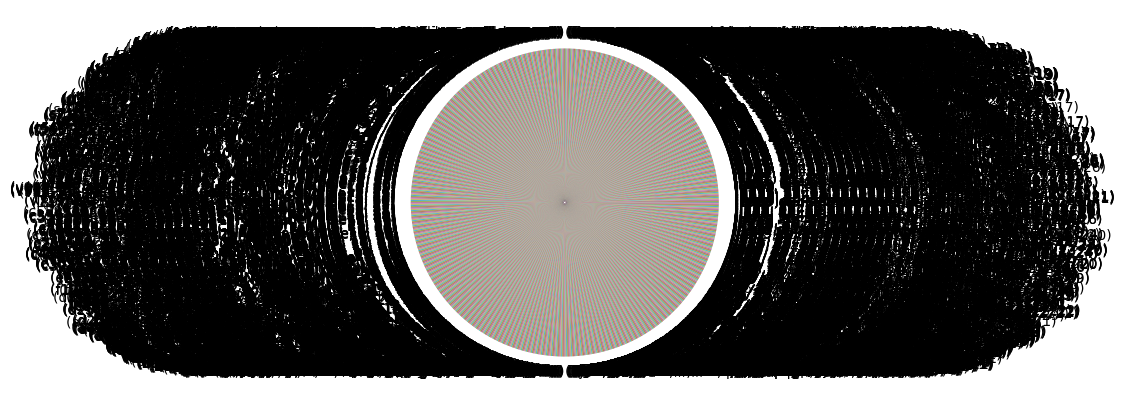

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_count=mouse_data_complete.value_counts()
mouse_sex_count.plot.pie(y='Sex',figsize=(5, 5))

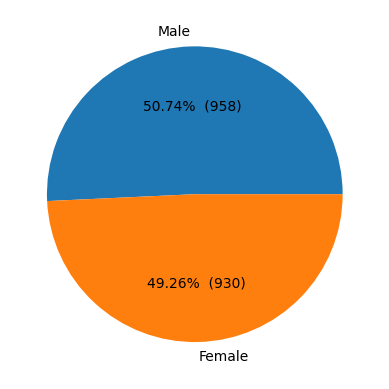

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#this block of code is not mine but taken from stackoverflow.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct




mouse_sex_data=[]
mouse_sex_data=mouse_data_complete['Sex'].value_counts().reset_index().rename(columns={0:"Sex",1:"Count"})
mouse_sex_data

mouse_sex_data_count=mouse_sex_data.count
mouse_sex_data_count



plt.pie(mouse_sex_data["Sex"],labels=["Male","Female"],autopct=make_autopct(mouse_sex_data["Sex"]))
plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#mouse_data_complete

# Start by getting the last (greatest) timepoint for each mouse
drug_timepoint=mouse_data_complete[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
drug_timepoint=drug_timepoint.sort_values('Timepoint', ascending=False) 
drug_timepoint=drug_timepoint.drop_duplicates(['Mouse ID']) #keeps first value seen, if ordered then the first value seen in the largest




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_timepoint_filter=drug_timepoint.loc[drug_timepoint['Drug Regimen'].isin(drugs)]
drug_timepoint_filter=drug_timepoint_filter.sort_values('Drug Regimen')
drug_timepoint_filter=drug_timepoint_filter.rename(columns={'Timepoint':'Last Timepoint',"Tumor Volume (mm3)":"Last Measure volume"})
drug_timepoint_filter

mouse_data_complete=pd.merge(mouse_data_complete,drug_timepoint_filter,how='left',on=["Mouse ID", "Mouse ID"])
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Last Timepoint,Last Measure volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN,NaN,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN,NaN,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN,NaN,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,Capomulin,45.0,41.581521
1884,u364,45,31.023923,3,Capomulin,Male,18,17,Capomulin,45.0,31.023923
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,Ceftamin,45.0,61.433892
1886,x773,45,58.634971,4,Placebo,Female,21,30,NaN,NaN,NaN


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
#lists to hold tumor sizes
Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]
#drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_timepoint_filter.reindex


# Create empty list to fill with tumor vol data (for plotting)
for x in range(len(drug_timepoint_filter.index)):
    
    if mouse_data_complete.iloc[x,5]=="Capomulin":
        Capomulin.append(mouse_data_complete.iloc[x,3])
    elif mouse_data_complete.iloc[x,5]=="Ramicane":
        Ramicane.append(mouse_data_complete.iloc[x,3])
    elif mouse_data_complete.iloc[x,5]=="Infubinol":
        Infubinol.append(mouse_data_complete.iloc[x,3])
    elif mouse_data_complete.iloc[x,5]=="Ceftamin":
        Ceftamin.append(mouse_data_complete.iloc[x,3])

print(Ceftamin)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_q3,Capomulin_q1=np.percentile(Capomulin, [75 ,25])
Capomulin_IQR=Capomulin_q3-Capomulin_q1
print(f"Capomulin IQR is: {Capomulin_IQR}")

Ramicane_q3,Ramicane_q1=np.percentile(Ramicane, [75 ,25])
Ramicane_IQR=Ramicane_q3-Ramicane_q1
print(f"Ramicane IQR is: {Ramicane_IQR}")

Infubinol_q3,Infubinol_q1=np.percentile(Infubinol, [75 ,25])
Infubinol_IQR=Infubinol_q3-Infubinol_q1
print(f"Infubinol IQR is: {Infubinol_IQR}")

Ceftamin_q3,Ceftamin_q1=np.percentile(Ceftamin, [75 ,25])
Ceftamin_IQR=Ceftamin_q3-Ceftamin_q1
print(f"Ceftamin IQR is: {Ceftamin_IQR}")

    
# Determine outliers using upper and lower
for x in range(len(Capomulin)):
    if Capomulin[x]>=(Capomulin_IQR*1.5+Capomulin_q3):
        print(f"There is an outlier in Capomulin:{Capomulin[x]}" )
    elif Capomulin[x]<=(Capomulin_q1-Capomulin_IQR*1.5):
        print(f"There is an outlier in Capomulin:{Capomulin[x]}" )

for x in range(len(Ramicane)):
    if Ramicane[x]>=(Ramicane_IQR*1.5+Ramicane_q3):
        print(f"There is an outlier in Ramicane:{Ramicane[x]}" )
    elif Ramicane[x]<=(Ramicane_q1-Ramicane_IQR*1.5):
        print(f"There is an outlier in Ramicane:{Ramicane[x]}" )

for x in range(len(Infubinol)):
    if Infubinol[x]>=(Infubinol_IQR*1.5+Infubinol_q3):
        print(f"There is an outlier in Infubinol:{Infubinol[x]}" )
    elif Infubinol[x]<=(Infubinol_q1-Infubinol_IQR*1.5):
        print(f"There is an outlier in Infubinol:{Infubinol[x]}" )

for x in range(len(Ceftamin)):
    if Ceftamin[x]>=(Ceftamin_IQR*1.5+Ceftamin_q3):
        print(f"There is an upper limit outlier in Ceftamin:{Ceftamin[x]}" )
    elif Ceftamin[x]<=(Ceftamin_q1-Ceftamin_IQR*1.5):
        print(f"There is a lower limit outlier in Ceftamin:{Ceftamin[x]}" )


[]


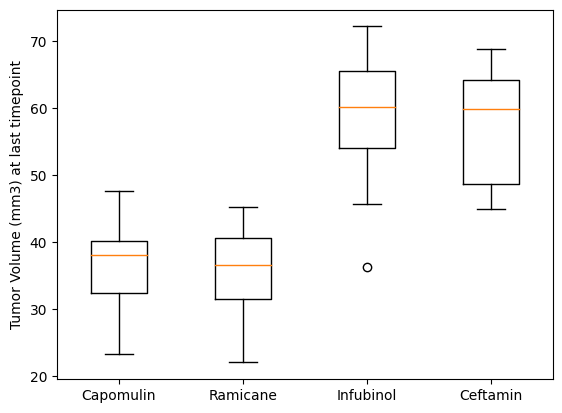

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin],labels=drugs)
plt.ylabel("Tumor Volume (mm3) at last timepoint")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Last Timepoint,Last Measure volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45.0,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN,NaN,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN,NaN,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN,NaN,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,Capomulin,45.0,41.581521
1884,u364,45,31.023923,3,Capomulin,Male,18,17,Capomulin,45.0,31.023923
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,Ceftamin,45.0,61.433892
1886,x773,45,58.634971,4,Placebo,Female,21,30,NaN,NaN,NaN


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight=mouse_data_complete[['Mouse ID'	,'Weight (g)','Drug Regimen_x']]
mouse_weight
#plt.scatter()


,Mouse ID,Weight (g),Drug Regimen_x
0,b128,22,Capomulin
1,f932,29,Ketapril
2,g107,29,Ketapril
3,a457,30,Ketapril
4,c819,25,Ketapril
...,...,...,...
1883,r944,25,Capomulin
1884,u364,17,Capomulin
1885,p438,26,Ceftamin
1886,x773,30,Placebo


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
